In [1]:
import sys
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})
# Import distances class
from pyACC.cosmology import *
# Import integration class
from pyACC.Calculus import *
from pyACC.clustering import *
import scipy as sp
import camb
from time import sleep
from tqdm.autonotebook import tqdm

/tmp/ipykernel_7918/1097803500.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
Omega_b = 0.05
Omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars= camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

pars.set_matter_power(redshifts=[50.], kmax=100.0)
result = camb.get_results(pars)

kh, z, pk = result.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 512)

pk_func = sp.interpolate.interp1d(kh, pk[0], kind='cubic', fill_value='extrapolate')

In [3]:
# define the box
side = 500 # Mpc/h
spacing = 5 # Mpc
delta_k,delta_x = generate_gaussian_map(pk_func, side, spacing)

In [4]:
Nobjects = 100000
catalog = poisson_sample_map(delta_x, side, spacing, Nobjects)
print(catalog.shape)

(100003, 3)


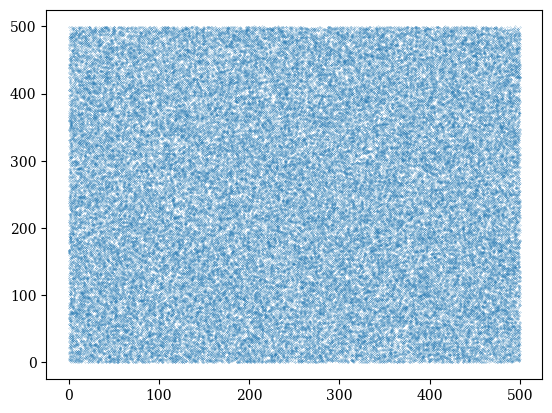

In [5]:
plt.plot(catalog[:,0], catalog[:,1], '.', markersize=0.3)

In [6]:
# count pairs 

rmax=50
Nbins=25

r,xi =  estimated_correlation_function(catalog,catalog,rmax,rmin=0,Nbins=Nbins,type='LS')


 Calculating DD... :   0%|          | 0/100003 [00:00<?, ?it/s]

 Calculating RR... :   0%|          | 0/100003 [00:00<?, ?it/s]

 Calculating DR... :   0%|          | 0/100003 [00:00<?, ?it/s]

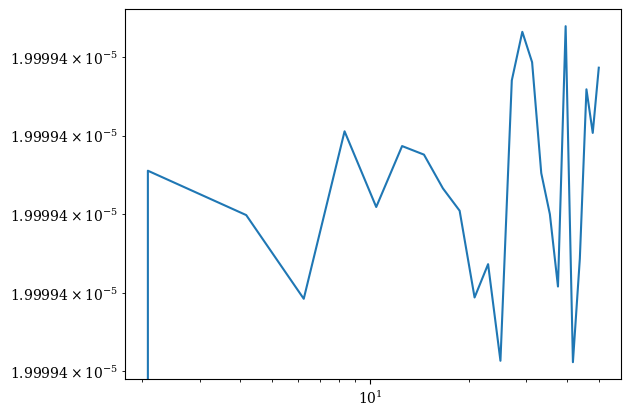

In [7]:
plt.loglog(r,xi)